# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import statistics
from scipy import stats
import plotly.express as px
from sklearn.metrics import mean_squared_error

array([[<AxesSubplot:title={'center':'num_passengers'}>,
        <AxesSubplot:title={'center':'purchase_lead'}>,
        <AxesSubplot:title={'center':'length_of_stay'}>],
       [<AxesSubplot:title={'center':'flight_hour'}>,
        <AxesSubplot:title={'center':'flight_day'}>,
        <AxesSubplot:title={'center':'wants_extra_baggage'}>],
       [<AxesSubplot:title={'center':'wants_preferred_seat'}>,
        <AxesSubplot:title={'center':'wants_in_flight_meals'}>,
        <AxesSubplot:title={'center':'flight_duration'}>],
       [<AxesSubplot:title={'center':'booking_complete'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

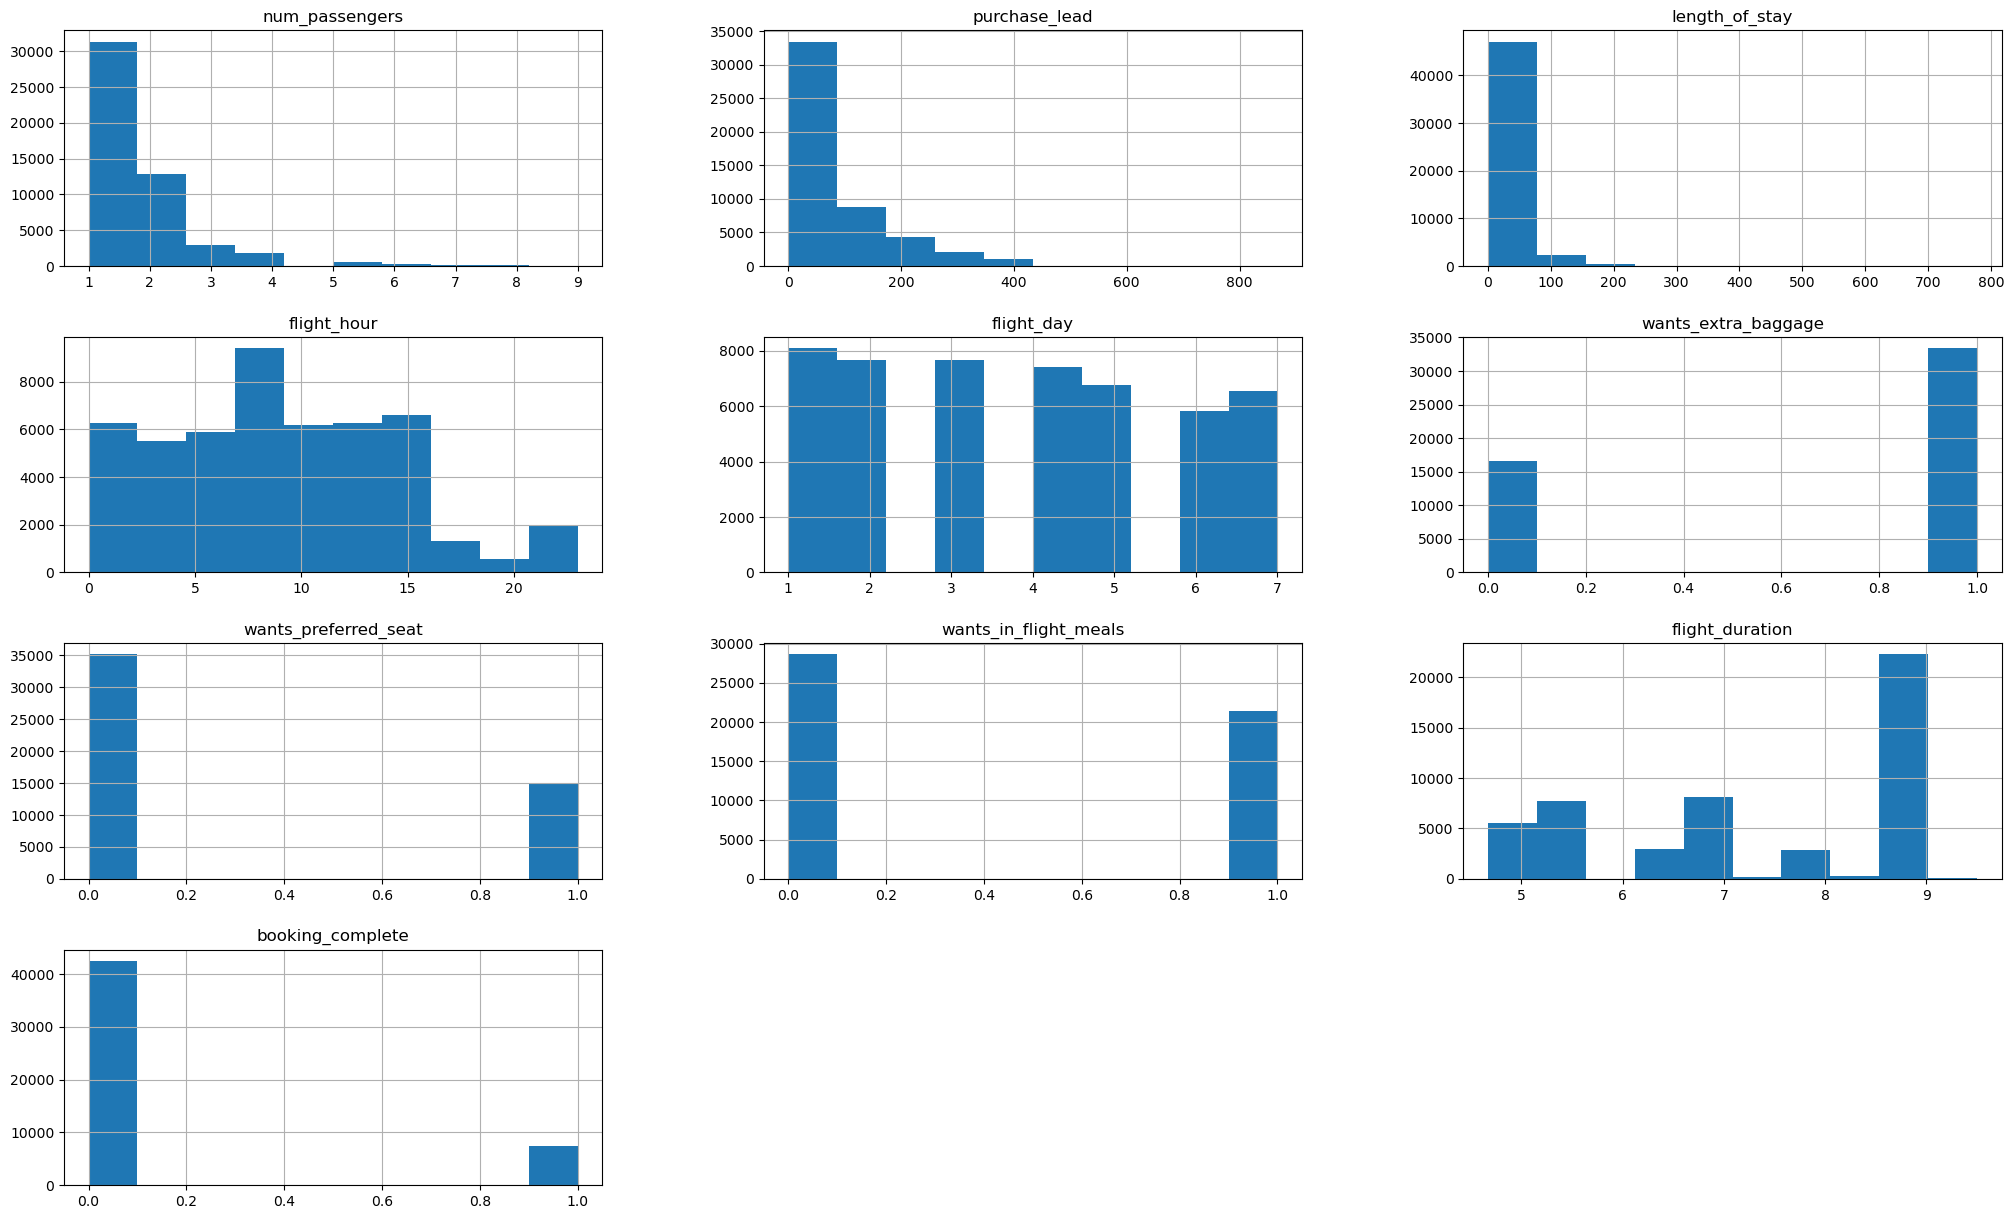

In [11]:
df.hist(figsize=(25,15))

<AxesSubplot:>

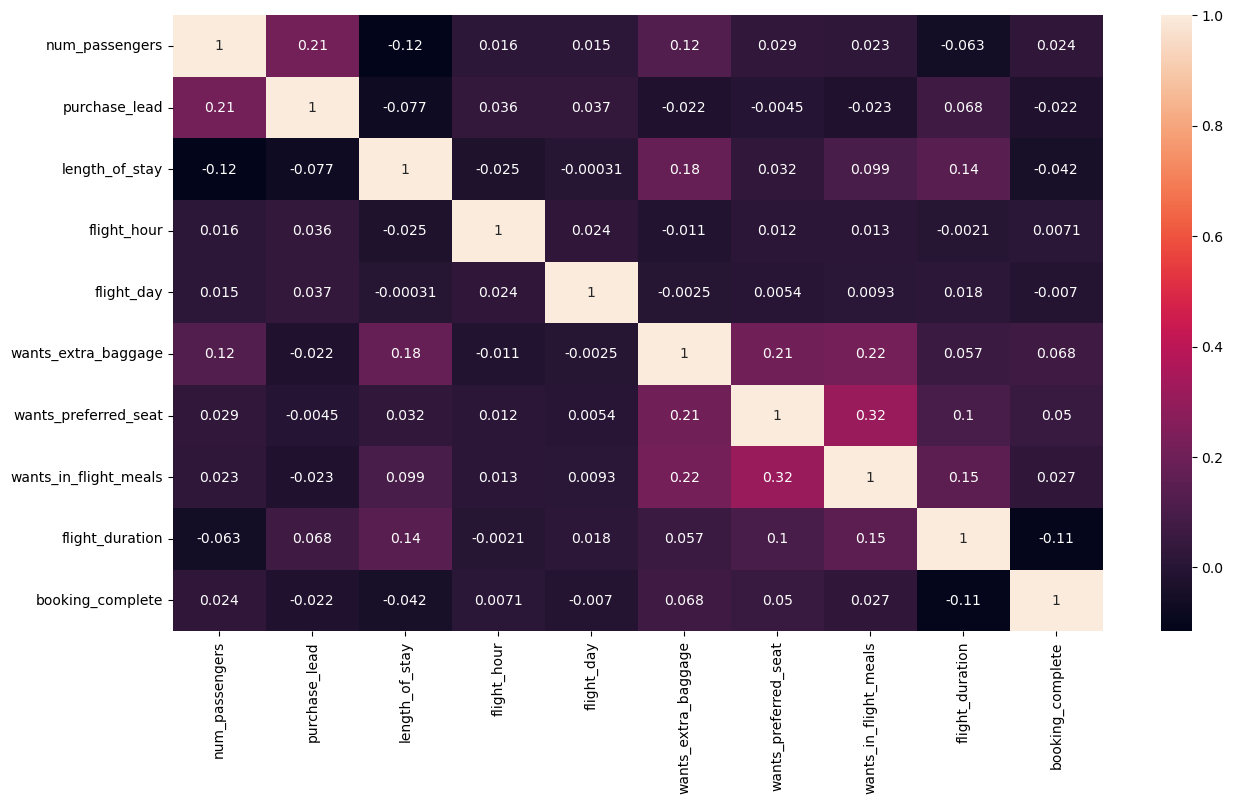

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="rocket")

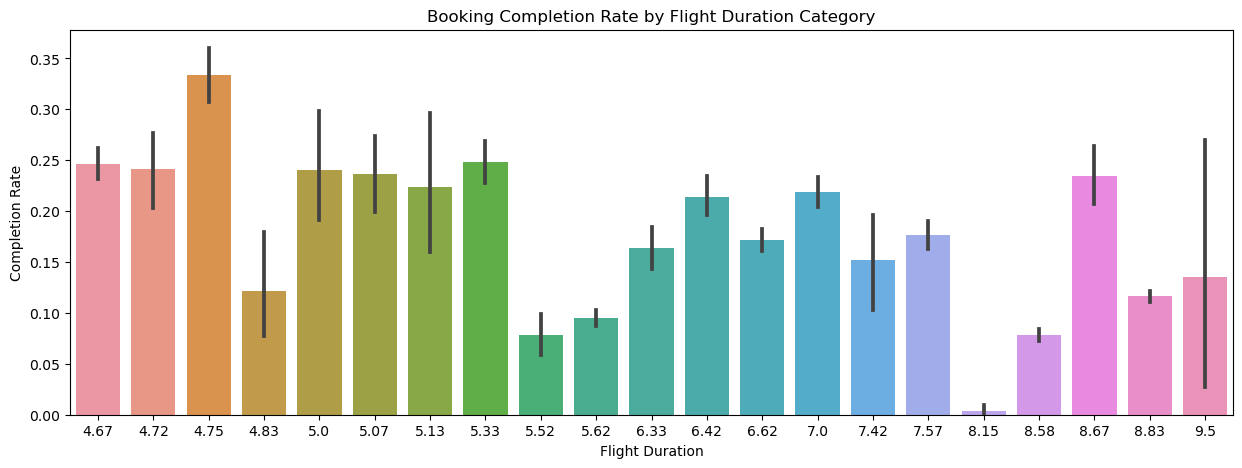

In [17]:
plt.figure(figsize=(15, 5))
sns.barplot(x="flight_duration", y="booking_complete", data=df, estimator=lambda x: sum(x) / len(x))
plt.title("Booking Completion Rate by Flight Duration Category")
plt.ylabel("Completion Rate")
plt.xlabel("Flight Duration")
plt.show()

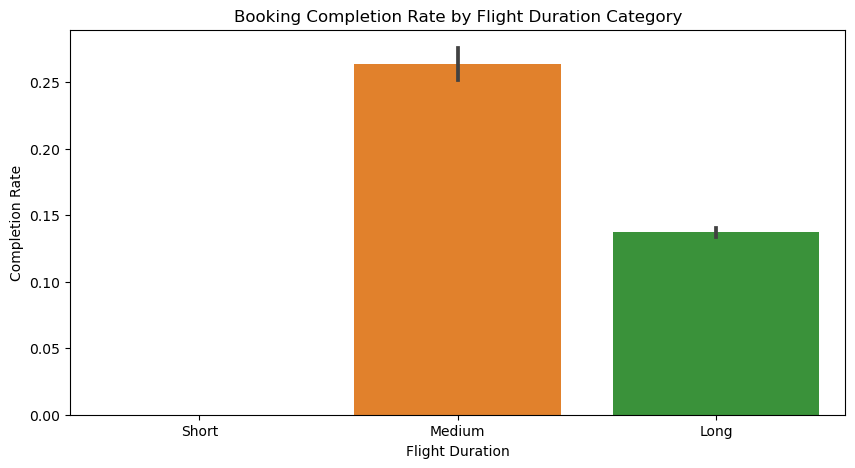

In [19]:
# Define bins for flight duration
df["flight_duration_category"] = pd.cut(df["flight_duration"], bins=[0, 2, 5, 10], labels=["Short", "Medium", "Long"])
plt.figure(figsize=(10, 5))
sns.barplot(x="flight_duration_category", y="booking_complete", data=df, estimator=lambda x: sum(x) / len(x))
plt.title("Booking Completion Rate by Flight Duration Category")
plt.ylabel("Completion Rate")
plt.xlabel("Flight Duration")
plt.show()

In [20]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete         

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
     

In [21]:
X.dtypes

num_passengers                 int64
sales_channel                  int64
trip_type                      int64
purchase_lead                  int64
length_of_stay                 int64
flight_hour                    int64
flight_day                     int64
route                          int64
booking_origin                 int64
wants_extra_baggage            int64
wants_preferred_seat           int64
wants_in_flight_meals          int64
flight_duration              float64
flight_duration_category    category
dtype: object

In [22]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,flight_duration_category
0,2,0,0,262,19,7,6,0,0,1,0,0,5.52,Long
1,1,0,0,112,20,3,6,0,0,0,0,0,5.52,Long
2,2,0,0,243,22,17,3,0,1,1,1,0,5.52,Long
3,1,0,0,96,31,4,6,0,0,0,0,1,5.52,Long
4,2,0,0,68,22,15,3,0,1,1,0,1,5.52,Long


In [25]:
for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()
     

In [26]:
df.dtypes

num_passengers                 int64
sales_channel                  int64
trip_type                      int64
purchase_lead                  int64
length_of_stay                 int64
flight_hour                    int64
flight_day                     int64
route                          int64
booking_origin                 int64
wants_extra_baggage            int64
wants_preferred_seat           int64
wants_in_flight_meals          int64
flight_duration              float64
booking_complete               int64
flight_duration_category    category
dtype: object

In [27]:
df["flight_dur_and_route"] = df["flight_duration"] * df["route"]
df["flight_origin"] = df["flight_duration"] * df["booking_origin"]
df["pass_and_baggage"] = df["num_passengers"] * df["wants_extra_baggage"]
df["pass_length_of_stay"] = df["num_passengers"] * df["length_of_stay"]


In [28]:
df.dtypes

num_passengers                 int64
sales_channel                  int64
trip_type                      int64
purchase_lead                  int64
length_of_stay                 int64
flight_hour                    int64
flight_day                     int64
route                          int64
booking_origin                 int64
wants_extra_baggage            int64
wants_preferred_seat           int64
wants_in_flight_meals          int64
flight_duration              float64
booking_complete               int64
flight_duration_category    category
flight_dur_and_route         float64
flight_origin                float64
pass_and_baggage               int64
pass_length_of_stay            int64
dtype: object

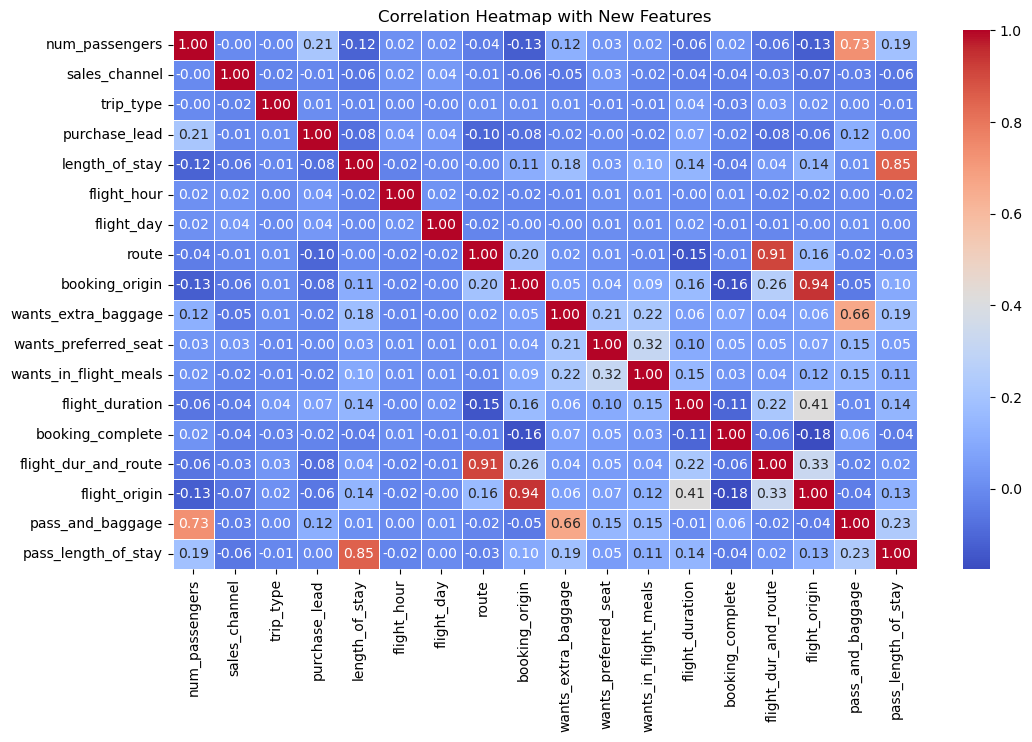

In [34]:
data = df.drop(['trip_type', 'sales_channel', 'wants_preferred_seat', 'flight_day'], axis=1)
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap with New Features")
plt.show()

In [37]:
data.dtypes

num_passengers                 int64
purchase_lead                  int64
length_of_stay                 int64
flight_hour                    int64
route                          int64
booking_origin                 int64
wants_extra_baggage            int64
wants_in_flight_meals          int64
flight_duration              float64
booking_complete               int64
flight_duration_category    category
flight_dur_and_route         float64
flight_origin                float64
pass_and_baggage               int64
pass_length_of_stay            int64
dtype: object

In [39]:
# Convert categorical features to numeric
X = data.copy()
X = data.drop(columns=['booking_complete'])

# Convert 'category' dtype columns to integer codes
for colname in X.select_dtypes(include=['category', 'object']):
    X[colname] = X[colname].cat.codes if X[colname].dtype.name == 'category' else X[colname].factorize()[0]

# Compute Mutual Information (MI) scores
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print(mi_scores)  # Display MI scores

flight_origin               0.050532
route                       0.050411
flight_dur_and_route        0.050034
booking_origin              0.048675
flight_duration             0.017018
flight_duration_category    0.010117
wants_extra_baggage         0.008519
pass_and_baggage            0.008235
length_of_stay              0.007247
pass_length_of_stay         0.005688
num_passengers              0.004268
wants_in_flight_meals       0.003877
purchase_lead               0.003876
flight_hour                 0.000321
Name: MI Scores, dtype: float64


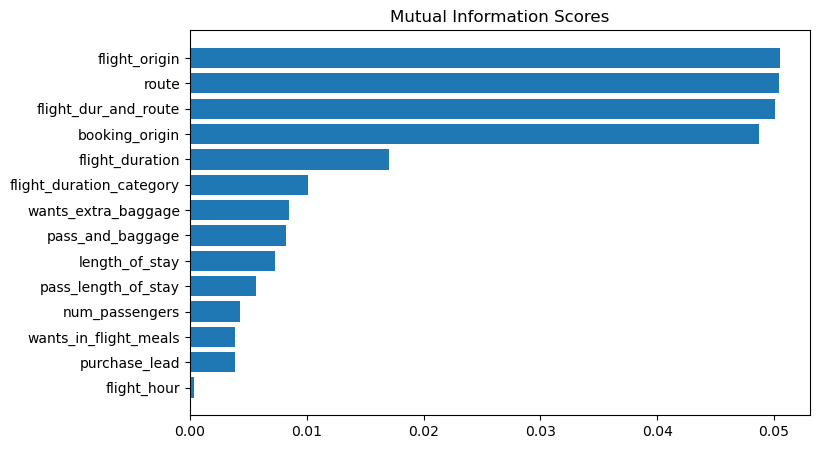

In [40]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [42]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [46]:
#Setting the input features and target variable

x = X[['flight_origin', 'route', 'flight_dur_and_route', 'booking_origin','flight_duration','flight_duration_category']].values
y = df['booking_complete'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30000, 6)
the shape of the training set (target) is: (30000,)

the shape of the cross validation set (input) is: (10000, 6)
the shape of the cross validation set (target) is: (10000,)

the shape of the test set (input) is: (10000, 6)
the shape of the test set (target) is: (10000,)


In [62]:
np.set_printoptions(precision=2)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the cross-validation set
y_pred_cv = rf_model.predict(x_cv)

# Evaluate the model
accuracy = accuracy_score(y_cv, y_pred_cv)
print(f"Cross-Validation Accuracy: {accuracy:.4f}\n")

# Print classification report
print("Classification Report:\n", classification_report(y_cv, y_pred_cv))


Cross-Validation Accuracy: 0.8417

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      8476
           1       0.38      0.06      0.11      1524

    accuracy                           0.84     10000
   macro avg       0.62      0.52      0.51     10000
weighted avg       0.78      0.84      0.79     10000



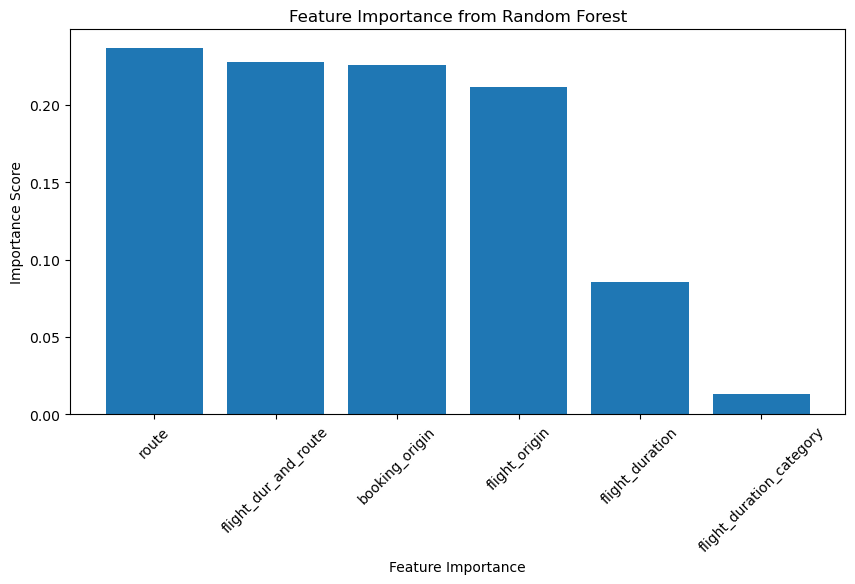

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
importances = rf_model.feature_importances_
feature_names = ['flight_origin', 'route', 'flight_dur_and_route', 'booking_origin', 'flight_duration', 'flight_duration_category']

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=45)
plt.xlabel("Feature Importance")
plt.ylabel("Importance Score")
plt.title("Feature Importance from Random Forest")
plt.show()

In [65]:
# Make predictions on the test set
y_pred_test = rf_model.predict(x_test)

# Compute accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print detailed classification report
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_test))


Test Accuracy: 0.8452
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8525
           1       0.36      0.06      0.10      1475

    accuracy                           0.85     10000
   macro avg       0.61      0.52      0.51     10000
weighted avg       0.78      0.85      0.80     10000



In [67]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities (column index 1 corresponds to class '1')
y_pred_probs = rf_model.predict_proba(x_test)[:, 1]  

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.7589


In [56]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ------------------------------------ 258.3/258.3 kB 407.4 kB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 1.6 MB/s eta 0:00:00


In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

# Train the Random Forest model on the SMOTE dataset
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_sm, y_train_sm)

# Predict on test set
y_pred = rf_model.predict(x_test)

# Evaluate performance
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.7362

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      8525
           1       0.31      0.65      0.42      1475

    accuracy                           0.74     10000
   macro avg       0.62      0.70      0.62     10000
weighted avg       0.83      0.74      0.77     10000



In [70]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities (column index 1 corresponds to class '1')
y_pred_probs = rf_model.predict_proba(x_test)[:, 1]  

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.7469
